In [1]:
from __future__ import division
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import scipy.interpolate
from scipy.optimize import curve_fit
#%matplotlib notebook
%matplotlib inline
#%matplotlib widget
#%load_ext autoreload
#%autoreload 2


# Meus modulos
#from func_GW_data import *
# import func_GW_data

plt.rc('lines', linewidth=3.0, markersize=10.0)
plt.rc('text', usetex=True)

SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(6, 5))
plt.rc('figure', autolayout=True)
                                                                                                                                        


Ry2eV = 13.605662285137

In [2]:
# Meus modulos
# from func_GW_data import *
import func_GW_data

import importlib
importlib.reload(func_GW_data)

<module 'func_GW_data' from '/mnt/d/OneDrive/0-Projects/MAPI/ANALYSIS/func_GW_data.py'>

In [3]:
def read_sigma(arquivo, nband, kpoint, col_2_get):
    
    Eqp = 0
    arq = open(arquivo)
    flag_read = False
    flag_found = False
    
    for line in arq:
        linha = line.split()
        if len(linha) > 0:
            if linha[0] == 'k':
                kx, ky, kz = float(linha[2]), float(linha[3]), float(linha[4])
                if kpoint[0] == kx and kpoint[1] == ky and kpoint[2] == kz:
                    flag_read = True
        if len(linha) == 15:
            if linha[0].isnumeric() is True and flag_read is True:
                if int(linha[0]) == nband:
                    flag_found = True
                    Eqp = float(linha[col_2_get])
                    
        if flag_found is True:
            break
    
    if flag_found is True:
        return Eqp
    else:
        print(arquivo + 'not found')
        return False

def ajuste_nbands(N, N0, a, b):
    return a/(N-N0) + b
                    
def ajuste_nbands2(Entrada, N0, E0, a, b, Econverg):
    N, Ecut = Entrada
    return a/(N-N0) + b/(Ecut - E0) + Econverg



In [4]:
import os

os.system('cd /mnt/d/Dropbox/0-Work/0-Projects/MAPI/ANALYSIS')

os.system('pwd')

/mnt/d/OneDrive/0-Projects/MAPI/ANALYSIS


sh: 1: cd: can't cd to /mnt/d/Dropbox/0-Work/0-Projects/MAPI/ANALYSIS


0

# Convergencia DFT


In [5]:
# Convergencia dft

arq_data = open('../DATA/convergenceQE/000/data')

KPOINTS = [3, 4, 6, 8, 10]
ECUTS = [40, 50, 60, 80, 100, 120]

DATA = []
for i in range(len(KPOINTS)):
    DATA.append([])
    for j in range(len(ECUTS)):
        DATA[-1].append(0.0)

        
for line in arq_data:
    linha = line.split()
    temp1 = linha[0].split(':')
    temp2 = temp1[0].split('-')
    kpoints = int(temp2[1])
    ecut = int(temp2[0].split('_')[1])
    E = float(linha[1])
    
    k_index = KPOINTS.index(kpoints)
    ecut_index = ECUTS.index(ecut)
    
    DATA[k_index][ecut_index] = E


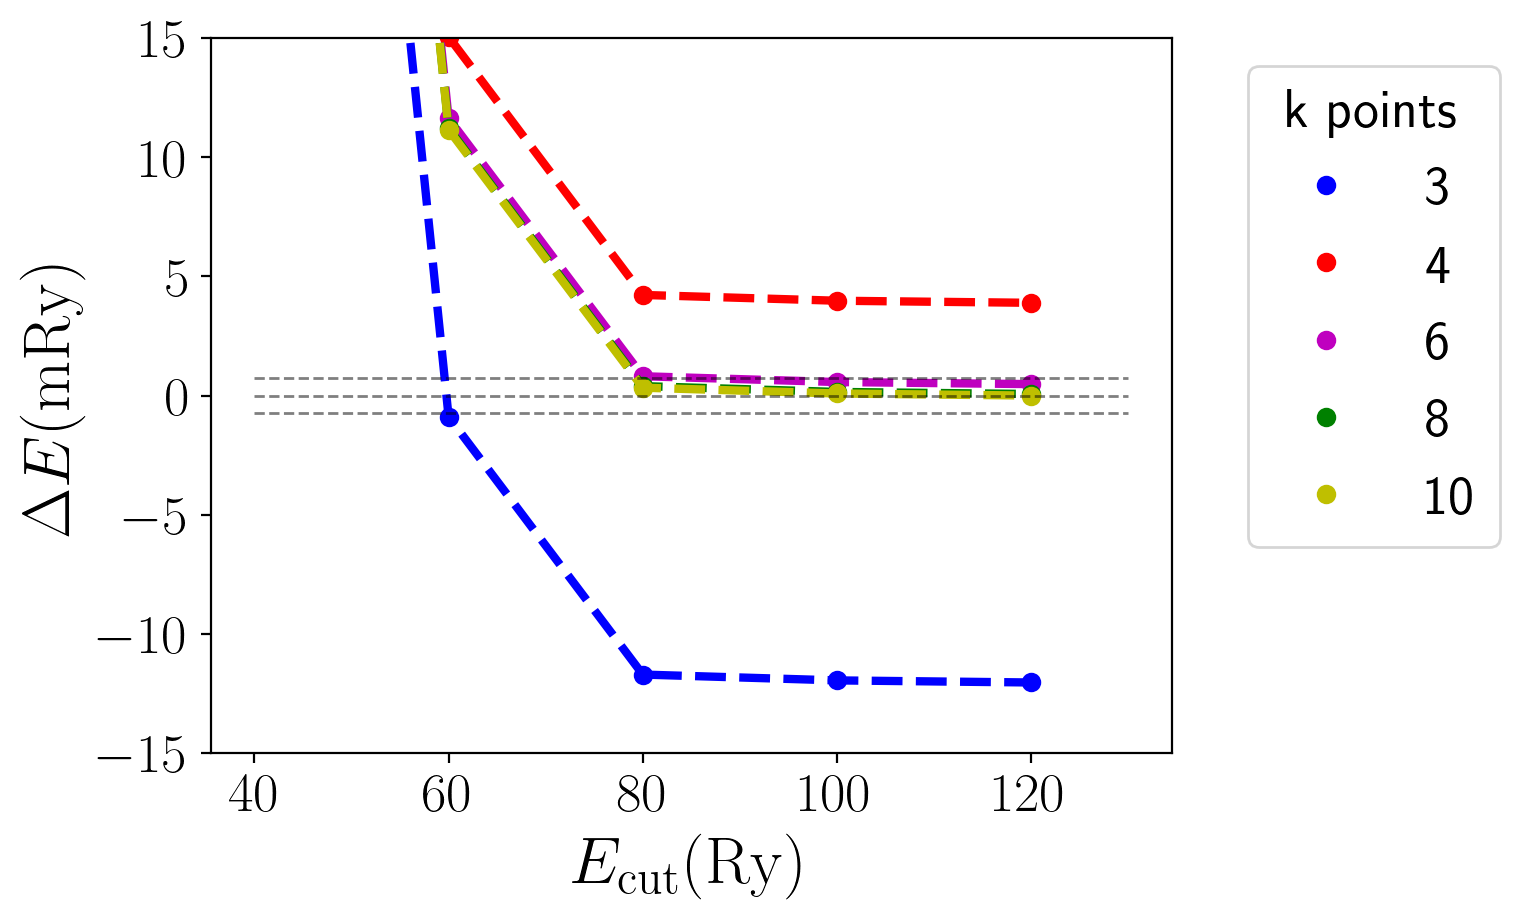

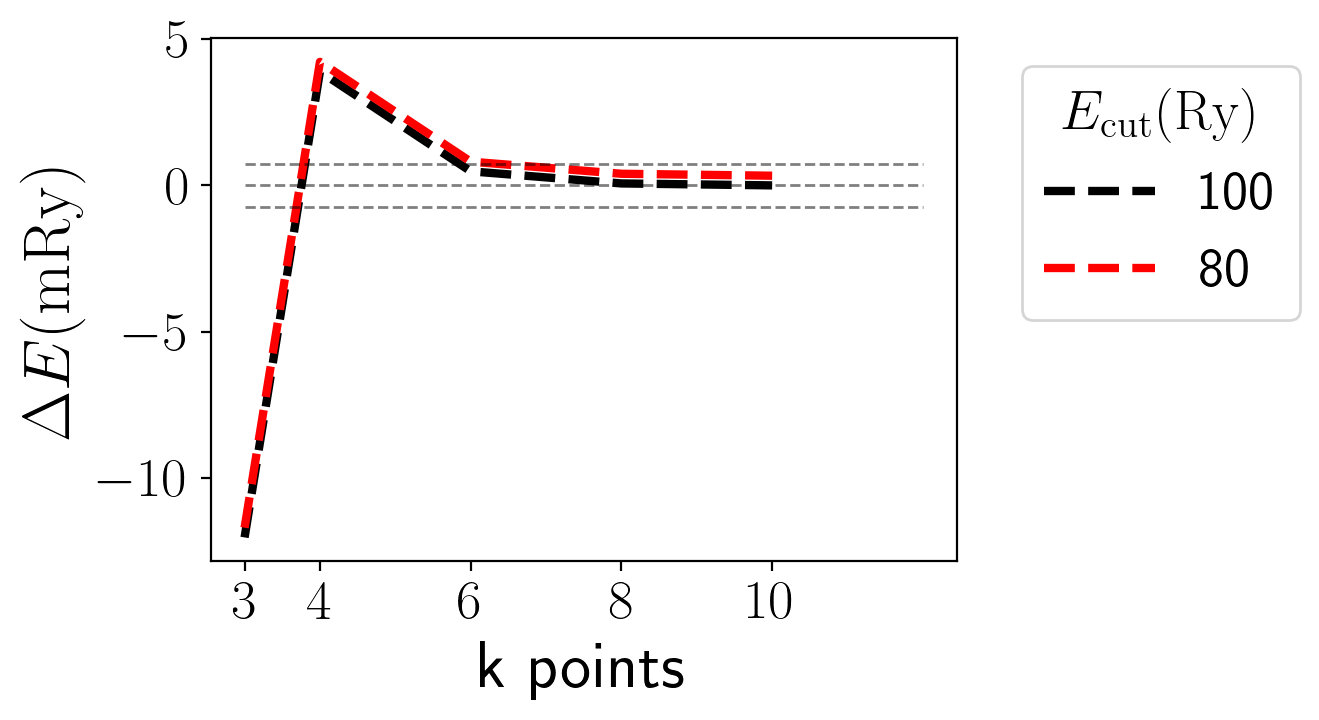

In [6]:
plt.figure(figsize=(8,5), dpi=200)

E_kmax = []
E_k80 = []


xvals = np.linspace(40, 120, 10)
colors = ['b', 'r', 'm', 'g', 'y']

e0 = DATA[-1][-1]

for i in range(len(KPOINTS)):
    y = (np.array(DATA[i]) - e0)*1000
    plt.plot(ECUTS, y, 'o', label=str(KPOINTS[i]), color=colors[i], markersize=6)
    plt.plot(ECUTS, y, '--', color=colors[i])
    E_kmax.append(y[-1])
    E_k80.append(y[-3])

E_kmax, E_k80 = np.array(E_kmax), np.array(E_k80)
#    yinterp = np.interp(xvals, DATA[i][0], np.array(DATA[i][1]) - e0)
#    plt.plot(xvals, yinterp, '--', color=colors[i])
    
    
barra_err = 1000*0.00073498810939358 # 10meV
#plt.plot([40, 130], [barra_err, barra_err], 'k--', linewidth=1)
#plt.plot([40, 130], [-barra_err, -barra_err], 'k--', linewidth=1)

plt.plot([40, 130], [1*barra_err, 1*barra_err], 'k--', linewidth=1, alpha=0.5)
plt.plot([40, 130], [-1*barra_err, -1*barra_err], 'k--', linewidth=1, alpha=0.5)
plt.plot([40, 130], [0, 0], 'k--', linewidth=1, alpha=0.5)

plt.ylim([-15, 15])

plt.ylabel(r'$\Delta E(\mathrm{mRy})$')
plt.xlabel(r'$E_{\mathrm{cut}}(\mathrm{Ry})$')

plt.legend(title='k points', bbox_to_anchor=(1.05, 1))

plt.savefig('convergenceDFT_Ecut_kpoints_fixed.png')


plt.figure(figsize=(7,4), dpi=200)

plt.plot(KPOINTS, E_kmax, 'k--', label='100')
plt.plot(KPOINTS, E_k80, 'r--', label='80')

plt.plot([3, 12], [1*barra_err, 1*barra_err], 'k--', linewidth=1, alpha=0.5)
plt.plot([3, 12], [-1*barra_err, -1*barra_err], 'k--', linewidth=1, alpha=0.5)
plt.plot([3, 12], [0, 0], 'k--', linewidth=1, alpha=0.5)

plt.legend(title=r'$E_{\mathrm{cut}}(\mathrm{Ry})$', bbox_to_anchor=(1.05, 1))

#plt.plot([3, 10], [barra_err, barra_err], 'k--', linewidth=1)
#plt.plot([3, 10], [-barra_err, -barra_err], 'k--', linewidth=1)

plt.xlabel('k points')
plt.ylabel(r'$\Delta E(\mathrm{mRy})$')
plt.xticks(KPOINTS)

plt.savefig('convergenceDFT_kpoints_Ecut_fixed.png')



# Convergencia GW


In [19]:
teste = '../DATA/convergenceGWBSE/3_kpts/7-sigma_250/sigma_hp.log'

k = [0, 0, 0]
print(24, read_sigma(teste, 24, k, 9))
print(25, read_sigma(teste, 25, k, 9))
print(26, read_sigma(teste, 26, k, 9))
print(27, read_sigma(teste, 27, k, 9))

teste = '../DATA/convergenceGWBSE/4_kpts/7-sigma_250/sigma_hp.log'

k = [1/2, 1/2, 1/2]
print(24, read_sigma(teste, 24, k, 9))
print(25, read_sigma(teste, 25, k, 9))
print(26, read_sigma(teste, 26, k, 9))
print(27, read_sigma(teste, 27, k, 9))

24 0.376694
25 0.523546
26 6.69424
27 7.670246
24 1.017553
25 2.272398
26 4.282684
27 4.416939


In [9]:
# variables

Nbands = [250, 500, 750, 1000]
Kpts = [3, 4, 6]


In [23]:
# gap em gamma

Kpts = [3, 4, 6]

ncol = 9

Egap_gamma = []
Ev2_gamma = []
Ec2_gamma = []

for kpoints in Kpts:
    Egap_gamma.append([])
    Ev2_gamma.append([])
    Ec2_gamma.append([])
    for bands in Nbands:
        arq = '../DATA/convergenceGWBSE/'+str(kpoints)+'_kpts/7-sigma_'+str(bands)+'/sigma_hp.log'
        eval = read_sigma(arq, 25, [0, 0, 0], ncol)
        Egap_gamma[-1].append(read_sigma(arq, 26, [0, 0, 0], ncol) - eval)
        Ec2_gamma[-1].append(read_sigma(arq, 27, [0, 0, 0], ncol) - eval)
        Ev2_gamma[-1].append(read_sigma(arq, 24, [0, 0, 0], ncol) - eval)

Egap_gamma = np.array(Egap_gamma)
Ev2_gamma = np.array(Ev2_gamma)
Ec2_gamma = np.array(Ec2_gamma)         
        
# gap em R

Kpts = [4, 6]

Egap_R = []
Ev2_R = []
Ec2_R = []

for kpoints in Kpts:
    Egap_R.append([])
    Ev2_R.append([])
    Ec2_R.append([])
    for bands in Nbands:
        arq = '../DATA/convergenceGWBSE/'+str(kpoints)+'_kpts/7-sigma_'+str(bands)+'/sigma_hp.log'
        eval = read_sigma(arq, 25, [1/2, 1/2, 1/2], ncol)
        Egap_R[-1].append(read_sigma(arq, 26, [1/2, 1/2, 1/2], ncol) - eval)
        Ec2_R[-1].append(read_sigma(arq, 27, [1/2, 1/2, 1/2], ncol) - eval)
        Ev2_R[-1].append(read_sigma(arq, 24, [1/2, 1/2, 1/2], ncol) - eval)

Egap_R = np.array(Egap_R)
Ev2_R = np.array(Ev2_R)
Ec2_R = np.array(Ec2_R)        
        
# gap em M

Kpts = [4, 6]

Egap_M = []
Ev2_M = []
Ec2_M = []

for kpoints in Kpts:
    Egap_M.append([])
    Ev2_M.append([])
    Ec2_M.append([])
    for bands in Nbands:
        arq = '../DATA/convergenceGWBSE/'+str(kpoints)+'_kpts/7-sigma_'+str(bands)+'/sigma_hp.log'
        eval = read_sigma(arq, 25, [1/2, 1/2, 0], ncol)
        Egap_M[-1].append(read_sigma(arq, 26, [1/2, 1/2, 0], ncol) - eval)
        Ec2_M[-1].append(read_sigma(arq, 27, [1/2, 1/2, 0], ncol) - eval)
        Ev2_M[-1].append(read_sigma(arq, 24, [1/2, 1/2, 0], ncol) - eval)        

Egap_M = np.array(Egap_M)
Ev2_M = np.array(Ev2_M)
Ec2_M = np.array(Ec2_M)

/home/rafael/miniconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/rafael/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


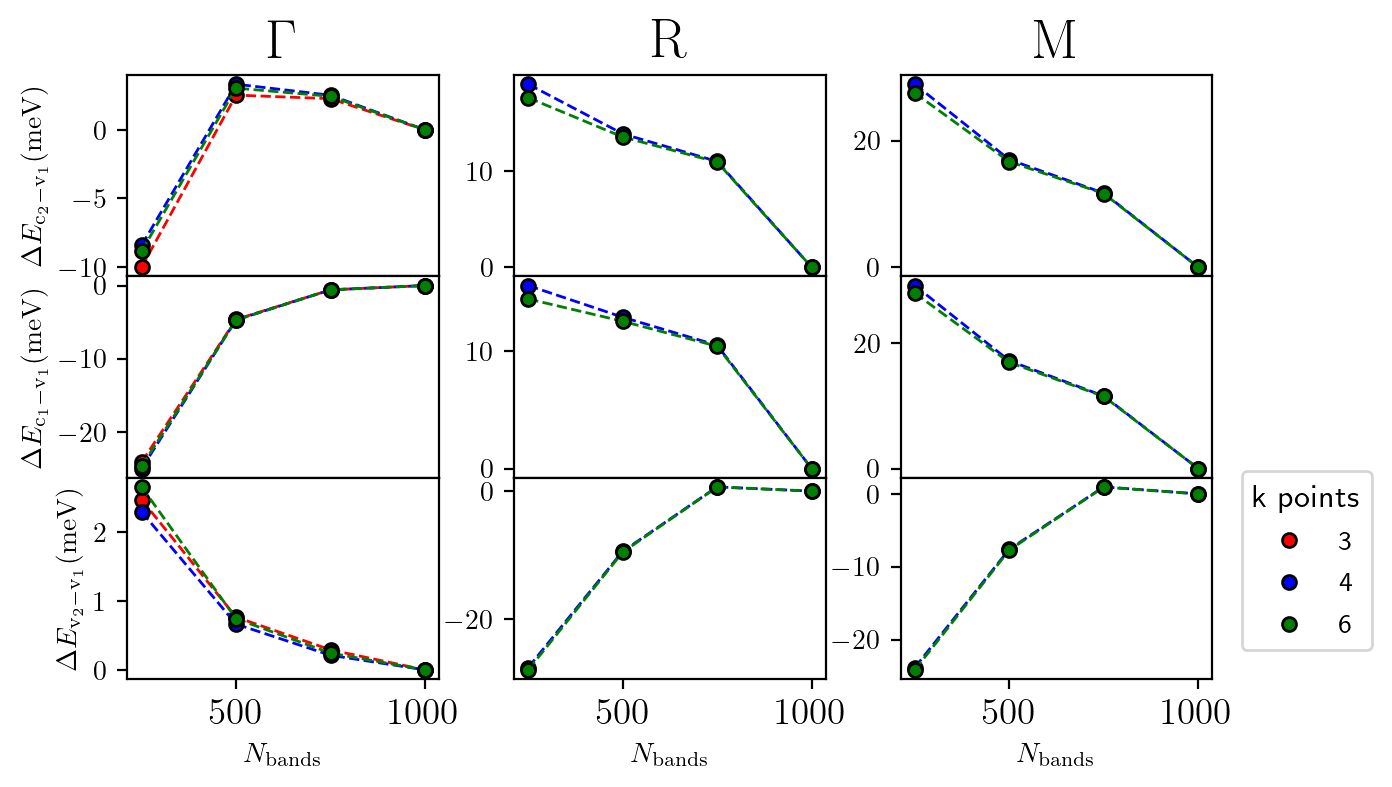

In [24]:
plt.rc('ytick', labelsize=SMALL_SIZE/2)    # fontsize of the tick labels
plt.rc('xtick', labelsize=2*SMALL_SIZE/3)    # fontsize of the tick labels
plt.rc('axes', labelsize=SMALL_SIZE/2)    # fontsize of the x and y labels
plt.rc('lines', linewidth=1.0, markersize=5.0, markeredgecolor='k')

fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True,
                       gridspec_kw={'hspace': 0.0, 'wspace': 0.24}, 
                      figsize=(7, 4), dpi=200)

cores = ['red', 'blue', 'green']

for i in range(3):
    
    plt.sca(axs[0][0])
    plt.ylabel(r'$\Delta E_{\mathrm{c_2 - v_1}} (\mathrm{meV})$')
    plt.title(r'$\Gamma$')
    plt.plot(Nbands, (Ec2_gamma[i] - Ec2_gamma[i][-1])*1000 , '--o', color=cores[i])
    
    plt.sca(axs[1][0])
    plt.ylabel(r'$\Delta E_{\mathrm{c_1 - v_1}} (\mathrm{meV})$')
    plt.plot(Nbands, (Egap_gamma[i] - Egap_gamma[i][-1])*1000 , '--o', color=cores[i])
    
    plt.sca(axs[2][0])
    plt.ylabel(r'$\Delta E_{\mathrm{v_2 - v_1}} (\mathrm{meV})$')
    plt.plot(Nbands, (Ev2_gamma[i] - Ev2_gamma[i][-1])*1000 , '--o', color=cores[i])
    plt.xlabel(r'$N_{\mathrm{bands}}$')
    
    

cores = ['blue', 'green']    
for i in range(2):    
    plt.sca(axs[0][1])
    plt.title(r'$\mathrm{R}$')
    plt.plot(Nbands, (Ec2_R[i] - Ec2_R[i][-1])*1000 , '--o', color=cores[i])
    plt.sca(axs[1][1])
    plt.plot(Nbands, (Egap_R[i] - Egap_R[i][-1])*1000 , '--o', color=cores[i])
    plt.sca(axs[2][1])
    plt.plot(Nbands, (Ev2_R[i] - Ev2_R[i][-1])*1000 , '--o', color=cores[i])
    plt.xlabel(r'$N_{\mathrm{bands}}$')
    


for i in range(2):    
    plt.sca(axs[0][2])
    plt.title(r'$\mathrm{M}$')
    plt.plot(Nbands, (Ec2_M[i] - Ec2_M[i][-1])*1000 , '--o', color=cores[i])    
    plt.sca(axs[1][2])
    plt.plot(Nbands, (Egap_M[i] - Egap_M[i][-1])*1000 , '--o', color=cores[i])
    plt.sca(axs[2][2])
    plt.plot(Nbands, (Ev2_M[i] - Ev2_M[i][-1])*1000 , '--o', color=cores[i])
    plt.xlabel(r'$N_{\mathrm{bands}}$')

legend_elements = [Line2D([0], [0], linewidth=0, marker='o', color='r', label='3', markersize=5),
                  Line2D([0], [0], linewidth=0, marker='o', color='b', label='4', markersize=5),
                  Line2D([0], [0], linewidth=0, marker='o', color='g', label='6', markersize=5)]
plt.rcParams['legend.title_fontsize'] = 'xx-small'
plt.legend(handles=legend_elements, title='k points', bbox_to_anchor=(1.05, 1.1), loc='upper left', fontsize=SMALL_SIZE/2)        

/home/rafael/miniconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/rafael/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


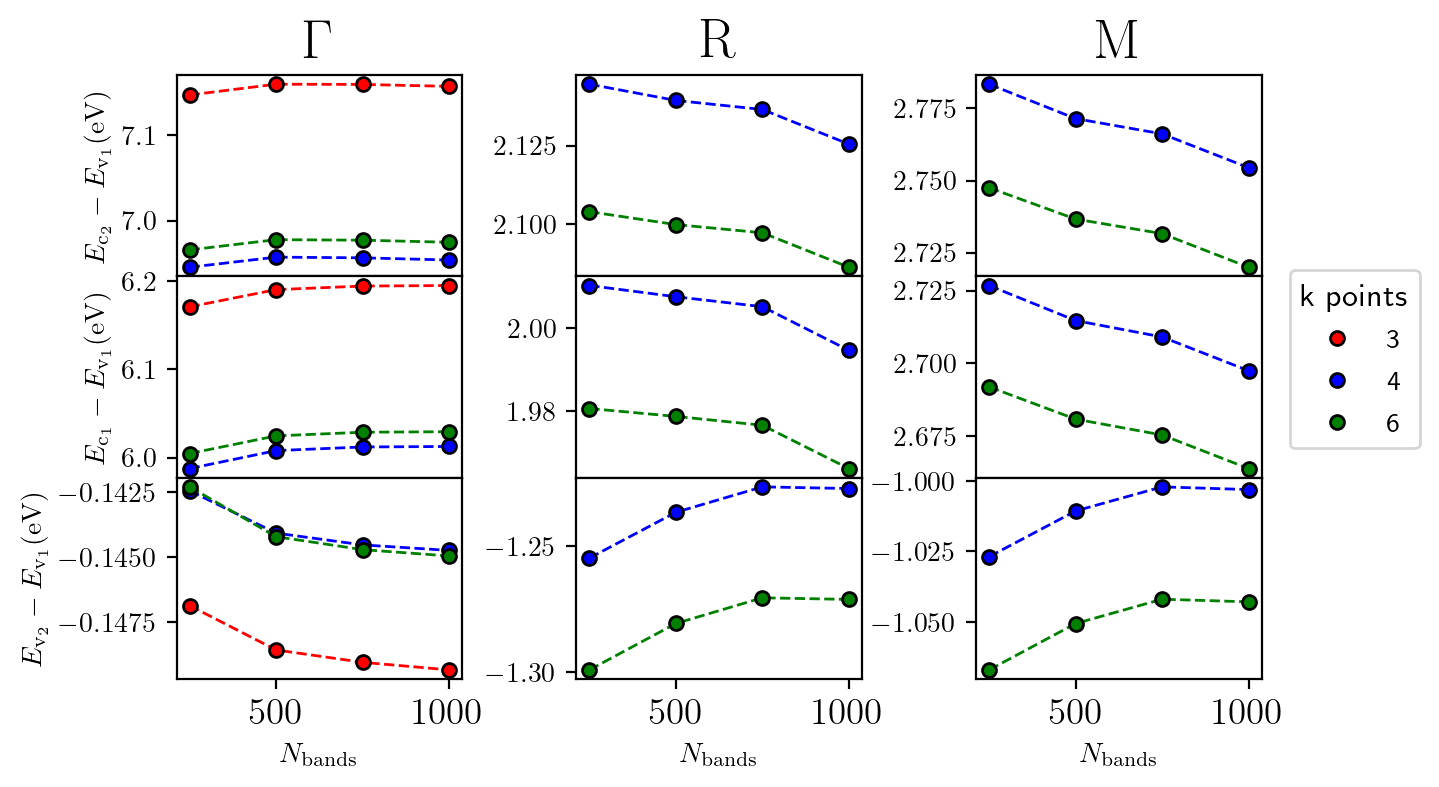

In [25]:
plt.rc('ytick', labelsize=SMALL_SIZE/2)    # fontsize of the tick labels
plt.rc('xtick', labelsize=2*SMALL_SIZE/3)    # fontsize of the tick labels
plt.rc('axes', labelsize=SMALL_SIZE/2)    # fontsize of the x and y labels
plt.rc('lines', linewidth=1.0, markersize=5.0, markeredgecolor='k')

fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True,
                       gridspec_kw={'hspace': 0.0, 'wspace': 0.4}, 
                      figsize=(7, 4), dpi=200)

cores = ['red', 'blue', 'green']

for i in range(3):
    
    plt.sca(axs[0][0])
    plt.title(r'$\Gamma$')
    plt.ylabel(r'$E_{\mathrm{c_2}} - E_{\mathrm{v_1}} (\mathrm{eV})$')
    plt.plot(Nbands, (Ec2_gamma[i]) , '--o', color=cores[i])
    
    plt.sca(axs[1][0])
    plt.ylabel(r'$E_{\mathrm{c_1}} - E_{\mathrm{v_1}} (\mathrm{eV})$')
    plt.plot(Nbands, (Egap_gamma[i]) , '--o', color=cores[i])
    
    plt.sca(axs[2][0])
    plt.ylabel(r'$E_{\mathrm{v_2}} - E_{\mathrm{v_1}} (\mathrm{eV})$')
    plt.plot(Nbands, (Ev2_gamma[i]) , '--o', color=cores[i])
    plt.xlabel(r'$N_{\mathrm{bands}}$')
    
    

cores = ['blue', 'green']    
for i in range(2): 
    
    plt.sca(axs[0][1])
    plt.title(r'$\mathrm{R}$')
    plt.plot(Nbands, (Ec2_R[i] ) , '--o', color=cores[i])
    
    plt.sca(axs[1][1])
    plt.plot(Nbands, (Egap_R[i] ) , '--o', color=cores[i])
    
    plt.sca(axs[2][1])
    plt.plot(Nbands, (Ev2_R[i]) , '--o', color=cores[i])
    plt.xlabel(r'$N_{\mathrm{bands}}$')
    


for i in range(2):    
    
    plt.sca(axs[0][2])
    plt.title(r'$\mathrm{M}$')
    plt.plot(Nbands, (Ec2_M[i]) , '--o', color=cores[i])    
    
    plt.sca(axs[1][2])
    plt.plot(Nbands, (Egap_M[i]) , '--o', color=cores[i])
    
    plt.sca(axs[2][2])
    plt.plot(Nbands, (Ev2_M[i]) , '--o', color=cores[i])
    plt.xlabel(r'$N_{\mathrm{bands}}$')


plt.sca(axs[1][2])    
#plt.plot(Nbands[-1], [0], 'ro', label='3')    
#plt.plot([0], [0], 'bo', label='4')
#plt.plot([0], [0], 'go', label='6')

legend_elements = [Line2D([0], [0], linewidth=0, marker='o', color='r', label='3', markersize=5),
                  Line2D([0], [0], linewidth=0, marker='o', color='b', label='4', markersize=5),
                  Line2D([0], [0], linewidth=0, marker='o', color='g', label='6', markersize=5)]
plt.rcParams['legend.title_fontsize'] = 'xx-small'
plt.legend(handles=legend_elements, title='k points', bbox_to_anchor=(1.05, 1.1), loc='upper left', fontsize=SMALL_SIZE/2)    

In [26]:
base_dir = '../DATA/convergenceGWBSE/2_kpts/'

ecut_eps = [10, 12, 14, 16, 20, 25, 30]
#ecut_eps = [10] 
Nbands = [250, 500, 1000, 1500, 2000]

DATA_Egap = [[], [], []]
DATA_Ev2 = [[], [], []]
DATA_Ec2 = [[], [], []]

DATA_Egap_wo_static_rem = [[], [], []]  # R Gamma M
DATA_Ev2_wo_static_rem = [[], [], []]
DATA_Ec2_wo_static_rem = [[], [], []]

for ecut in ecut_eps:
    
    for i in range(len(DATA_Egap)):

        DATA_Egap[i].append([])
        DATA_Ev2[i].append([])
        DATA_Ec2[i].append([])

        DATA_Egap_wo_static_rem[i].append([])
        DATA_Ev2_wo_static_rem[i].append([])
        DATA_Ec2_wo_static_rem[i].append([])
    
    for bands in Nbands:
    
        arq = base_dir+'ecut_'+str(ecut)+'/7-sigma_'+str(bands)+'/sigma_hp.log'
        
        kpoint = [1/2, 1/2, 1/2]
        
        ncol = 9
        eval = read_sigma(arq, 25, kpoint, ncol)
        DATA_Egap[0][-1].append(read_sigma(arq, 26, kpoint, ncol) - eval)
        DATA_Ec2[0][-1].append(read_sigma(arq, 27, kpoint, ncol) - eval)
        DATA_Ev2[0][-1].append(read_sigma(arq, 24, kpoint, ncol) - eval)
        
        ncol = 13
        eval = read_sigma(arq, 25, kpoint, ncol)
        DATA_Egap_wo_static_rem[0][-1].append(read_sigma(arq, 26, kpoint, ncol) - eval)
        DATA_Ec2_wo_static_rem[0][-1].append(read_sigma(arq, 27, kpoint, ncol) - eval)
        DATA_Ev2_wo_static_rem[0][-1].append(read_sigma(arq, 24, kpoint, ncol) - eval)
        
        kpoint = [0, 0, 0]
        
        ncol = 9
        eval = read_sigma(arq, 25, kpoint, ncol)
        DATA_Egap[1][-1].append(read_sigma(arq, 26, kpoint, ncol) - eval)
        DATA_Ec2[1][-1].append(read_sigma(arq, 27, kpoint, ncol) - eval)
        DATA_Ev2[1][-1].append(read_sigma(arq, 24, kpoint, ncol) - eval)
        
        ncol = 13
        eval = read_sigma(arq, 25, kpoint, ncol)
        DATA_Egap_wo_static_rem[1][-1].append(read_sigma(arq, 26, kpoint, ncol) - eval)
        DATA_Ec2_wo_static_rem[1][-1].append(read_sigma(arq, 27, kpoint, ncol) - eval)
        DATA_Ev2_wo_static_rem[1][-1].append(read_sigma(arq, 24, kpoint, ncol) - eval)        
        
        kpoint = [1/2, 1/2, 0]
        
        ncol = 9
        eval = read_sigma(arq, 25, kpoint, ncol)
        DATA_Egap[2][-1].append(read_sigma(arq, 26, kpoint, ncol) - eval)
        DATA_Ec2[2][-1].append(read_sigma(arq, 27, kpoint, ncol) - eval)
        DATA_Ev2[2][-1].append(read_sigma(arq, 24, kpoint, ncol) - eval)
        
        ncol = 13
        eval = read_sigma(arq, 25, kpoint, ncol)
        DATA_Egap_wo_static_rem[2][-1].append(read_sigma(arq, 26, kpoint, ncol) - eval)
        DATA_Ec2_wo_static_rem[2][-1].append(read_sigma(arq, 27, kpoint, ncol) - eval)
        DATA_Ev2_wo_static_rem[2][-1].append(read_sigma(arq, 24, kpoint, ncol) - eval)        

-1 30
-2 25
-3 20
-4 16
-5 14
-6 12
-7 10


<ipython-input-27-49e799f1a922>:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('convergenceGW_severalGaps_Nbands_Ecut_fixed.png', bbox_extra_artists=(legend1,legend2), bbox_inches='tight')


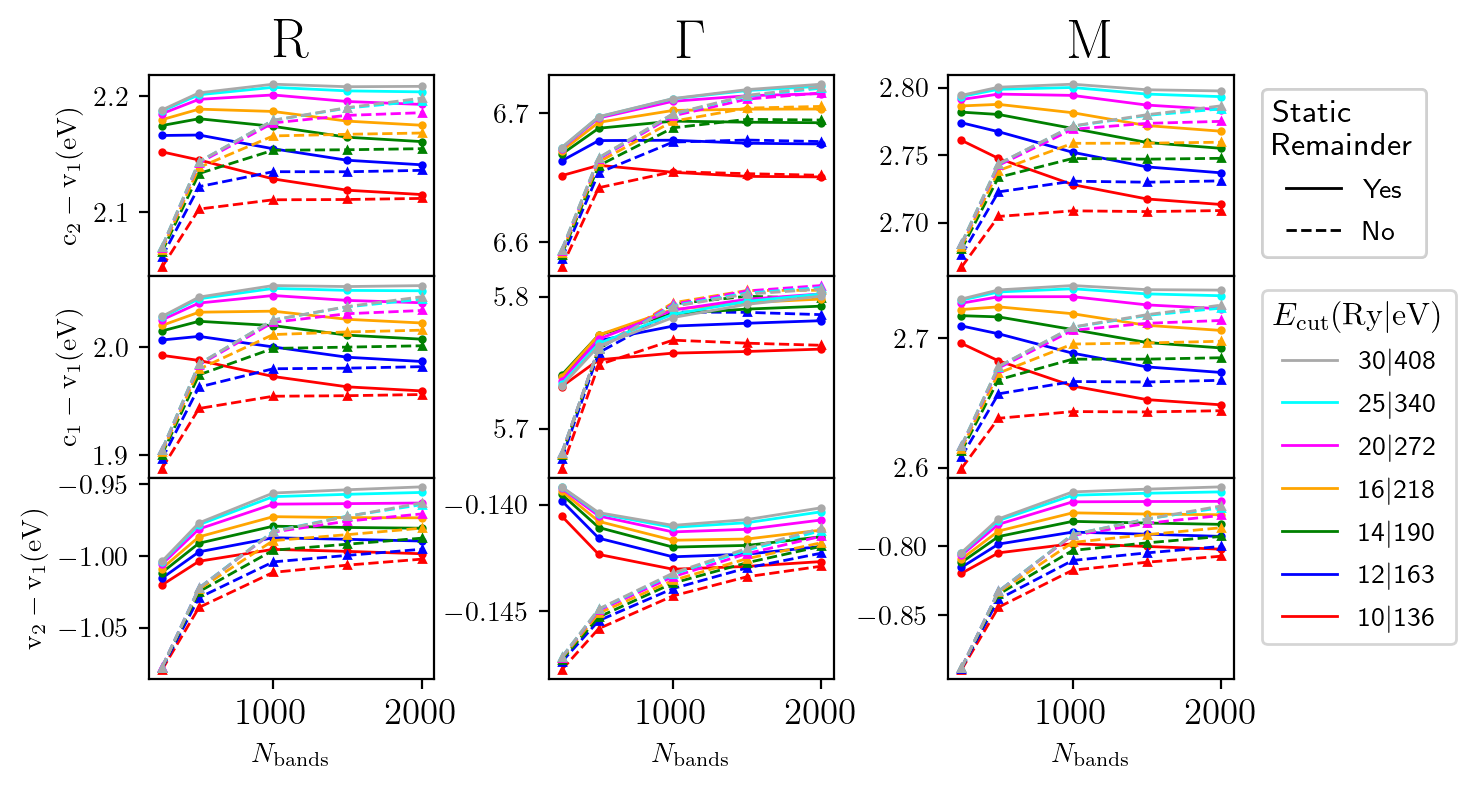

In [27]:
plt.rc('ytick', labelsize=SMALL_SIZE/2)    # fontsize of the tick labels
plt.rc('xtick', labelsize=2*SMALL_SIZE/3)    # fontsize of the tick labels
plt.rc('axes', labelsize=SMALL_SIZE/2)    # fontsize of the x and y labels
plt.rc('lines', linewidth=1.0, markersize=2.0) #, markeredgecolor='k')

fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True,
                       gridspec_kw={'hspace': 0.0, 'wspace': 0.4}, 
                       figsize=(7, 4), dpi=200)

plt.sca(axs[0][0])
plt.title(r'$\mathrm{R}$')
plt.ylabel(r'$\mathrm{c_2} - \mathrm{v_1} (\mathrm{eV})$')

plt.sca(axs[0][1])
plt.title(r'$\Gamma$')

plt.sca(axs[0][2])
plt.title(r'$\mathrm{M}$')

plt.sca(axs[1][0])
plt.ylabel(r'$\mathrm{c_1} - \mathrm{v_1} (\mathrm{eV})$')
    
plt.sca(axs[2][0])
plt.ylabel(r'$\mathrm{v_2} -\mathrm{v_1} (\mathrm{eV})$')
plt.xlabel(r'$N_{\mathrm{bands}}$')    

plt.sca(axs[2][1])
plt.xlabel(r'$N_{\mathrm{bands}}$')    

plt.sca(axs[2][2])
plt.xlabel(r'$N_{\mathrm{bands}}$')    

cores = ['red', 'blue', 'green', 'orange', 'magenta', 'cyan' ,'darkgray']



for j in range(3):
    
    for i in range(len(ecut_eps)):

        # plotting c2 - v1
        plt.sca(axs[0][j])
        plt.plot(Nbands, DATA_Ec2_wo_static_rem[j][i] , '--^', color=cores[i], markeredgecolor=cores[i])
        plt.plot(Nbands, DATA_Ec2[j][i] , '-o', color=cores[i], markeredgecolor=cores[i])
        
        # plotting gap
        plt.sca(axs[1][j])
        plt.plot(Nbands, DATA_Egap_wo_static_rem[j][i] , '--^', color=cores[i], markeredgecolor=cores[i])
        plt.plot(Nbands, DATA_Egap[j][i] , '-o', color=cores[i], markeredgecolor=cores[i])
        
        # plotting v2 - v1
        plt.sca(axs[2][j])
        plt.plot(Nbands, DATA_Ev2_wo_static_rem[j][i] , '--^', color=cores[i], markeredgecolor=cores[i])    
        plt.plot(Nbands, DATA_Ev2[j][i] , '-o', color=cores[i], markeredgecolor=cores[i])
    

    
legend_elements = [Line2D([0], [0], linewidth=0, marker='o', color='r', label='3', markersize=5),
                  Line2D([0], [0], linewidth=0, marker='o', color='b', label='4', markersize=5),
                  Line2D([0], [0], linewidth=0, marker='o', color='g', label='6', markersize=5)]


legend_elements = []

for i in range(-1, -len(ecut_eps) - 1, -1):
    print(i, ecut_eps[i])
    ecut = ecut_eps[i]
    legend_elements.append(Line2D([0], [0], linewidth=1, 
                                  color=cores[i], label=str(ecut)+r'$|$'+str("{:.0f}".format(ecut*Ry2eV)), markersize=0))
    
   

plt.rcParams['legend.title_fontsize'] = 'xx-small'


legend_elements2 = []

legend_elements2.append(Line2D([0], [0], linewidth=1, 
                       color='k', label='Yes', markersize=0))    

legend_elements2.append(Line2D([0], [0], linewidth=1, linestyle='--',
                       color='k', label='No', markersize=0)) 

legend1 = plt.legend(handles=legend_elements, title=r'$E_{\mathrm{cut}} \mathrm{(Ry | eV)}$', bbox_to_anchor=(1.05, 2), loc='upper left', fontsize=SMALL_SIZE/2)    
legend2 = plt.legend(handles=legend_elements2, title='Static \n Remainder', bbox_to_anchor=(1.05, 3), loc='upper left', fontsize=SMALL_SIZE/2)  


fig.add_artist(legend1)
fig.add_artist(legend2)

plt.savefig('convergenceGW_severalGaps_Nbands_Ecut_fixed.png', bbox_extra_artists=(legend1,legend2), bbox_inches='tight')


In [28]:

# Ajustes

Egap_at_N_to_inf = []
Egap_at_Nbands = []
Egap_at_Nbands_SR = []

for i in range(len(Nbands)):
    Egap_at_Nbands.append([])
    Egap_at_Nbands_SR.append([])
    for j in range(len(ecut_eps)):
        Egap_at_Nbands[-1].append(DATA_Egap_wo_static_rem[0][j][i])
        Egap_at_Nbands_SR[-1].append(DATA_Egap[0][j][i])

for i in range(len(ecut_eps)):
    
    # ajuste_nbands(N, N0, a, b) -> a/(N-N0) + b
    popt, pcov = curve_fit(ajuste_nbands, Nbands, DATA_Egap_wo_static_rem[0][i])
    Egap_at_N_to_inf.append(popt[-1])



    


[ 6.15510819 -0.34760681  2.04347905]
[ 3.3488348  -0.84077796  2.08116037]
[ 2.50352835 -1.17045476  2.11344047]


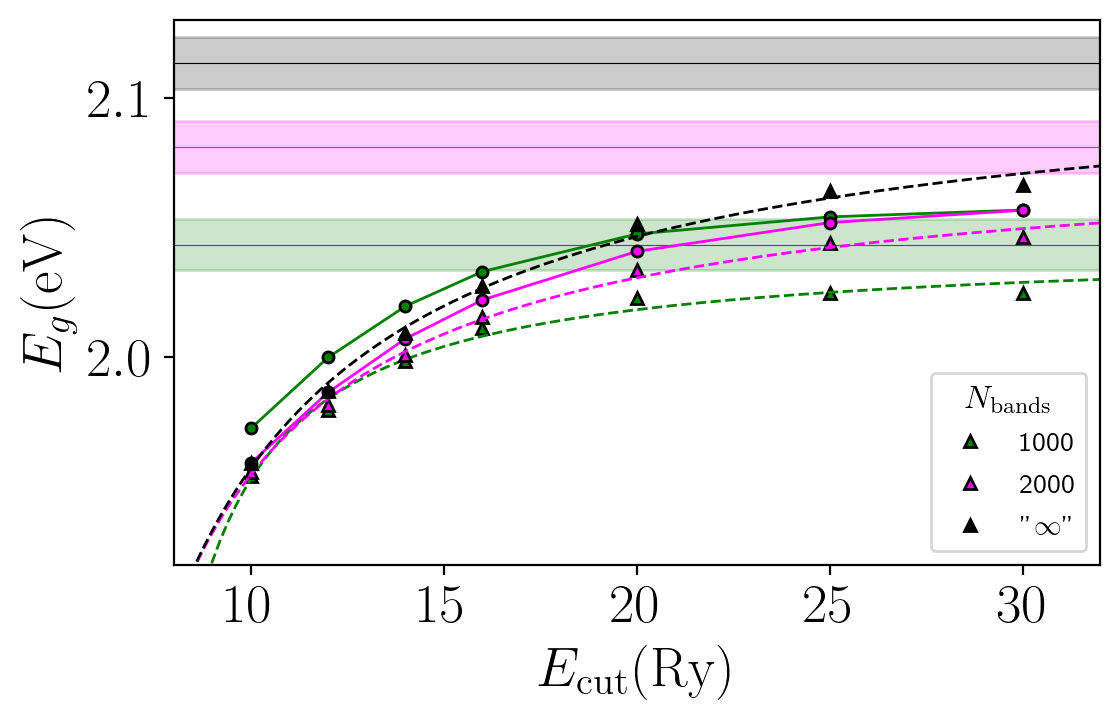

In [30]:
def ajuste_nbands(N, N0, a, b):
    return a/(N-N0) + b


plt.rc('lines', linewidth=1.0, markersize=4.0)

plt.figure(figsize=(6,4), dpi=200)


x = np.array(ecut_eps)
error = 0.01

#z = np.polyfit(x, y, 1)
#xfit = np.arange(0.0, max(x), max(x)/100)
#plt.plot(xfit, np.poly1d(z)(xfit), 'k--')


for i in range(2, len(Nbands), 2):
    y = Egap_at_Nbands[i]
    plt.plot(x, y, '^', label=str(Nbands[i]), color=cores[i])
    
    popt, pcov = curve_fit(ajuste_nbands, x[0:7], y[0:7], maxfev=10000)
    xfit = np.arange(min(x)-2, max(x)+5, 0.2)
    plt.plot(xfit, ajuste_nbands(xfit, *popt), '--', color=cores[i])
    
    Einf = popt[-1]

    plt.fill_between([0, 40], Einf + error, Einf - error, color = cores[i], alpha=0.2)
    plt.plot([0, 40], [Einf, Einf], color=cores[i], linewidth=0.4)
    
    y = Egap_at_Nbands_SR[i]
    plt.plot(x, y, '-o', color=cores[i])
    
    print(popt)

y = Egap_at_N_to_inf
plt.plot(x, y, '^', label=r'"$\infty$"', color='black')

popt, pcov = curve_fit(ajuste_nbands, x, y)
xfit = np.arange(min(x)-2, max(x)+5, 0.2)
plt.plot(xfit, ajuste_nbands(xfit, *popt), '--', color='k')

Einf = popt[-1]
plt.fill_between([0, 32], Einf + error, Einf - error, color = 'k', alpha=0.2)
plt.plot([0, 32], [Einf, Einf], color='k', linewidth=0.4)
print(popt)

#plt.xlabel(r'$1/E_{\mathrm{cut}} (1/\mathrm{Ry})$')
plt.xlabel(r'$E_{\mathrm{cut}} (\mathrm{Ry})$')
plt.ylabel(r'$E_g(\mathrm{eV})$')
   

plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2.0, markersize=8.0) #, markeredgecolor='k')

plt.legend(bbox_to_anchor=(1.05, 0.4), loc='lower left', fontsize=SMALL_SIZE/2, title=r'$N_{\mathrm{bands}}$')
plt.legend(loc='lower right', fontsize=SMALL_SIZE/2, title=r'$N_{\mathrm{bands}}$')

plt.ylim([1.92, 2.13])
plt.xlim([8, 32])

plt.savefig('convergenceGW_Rpoints_Ecut_Nbandas_fixed.png')

In [ ]:
Egap_at_Nbands

NameError: name 'Egap_at_Nbands' is not defined

-1 30
-2 25
-3 20
-4 16
-5 14
-6 12
-7 10


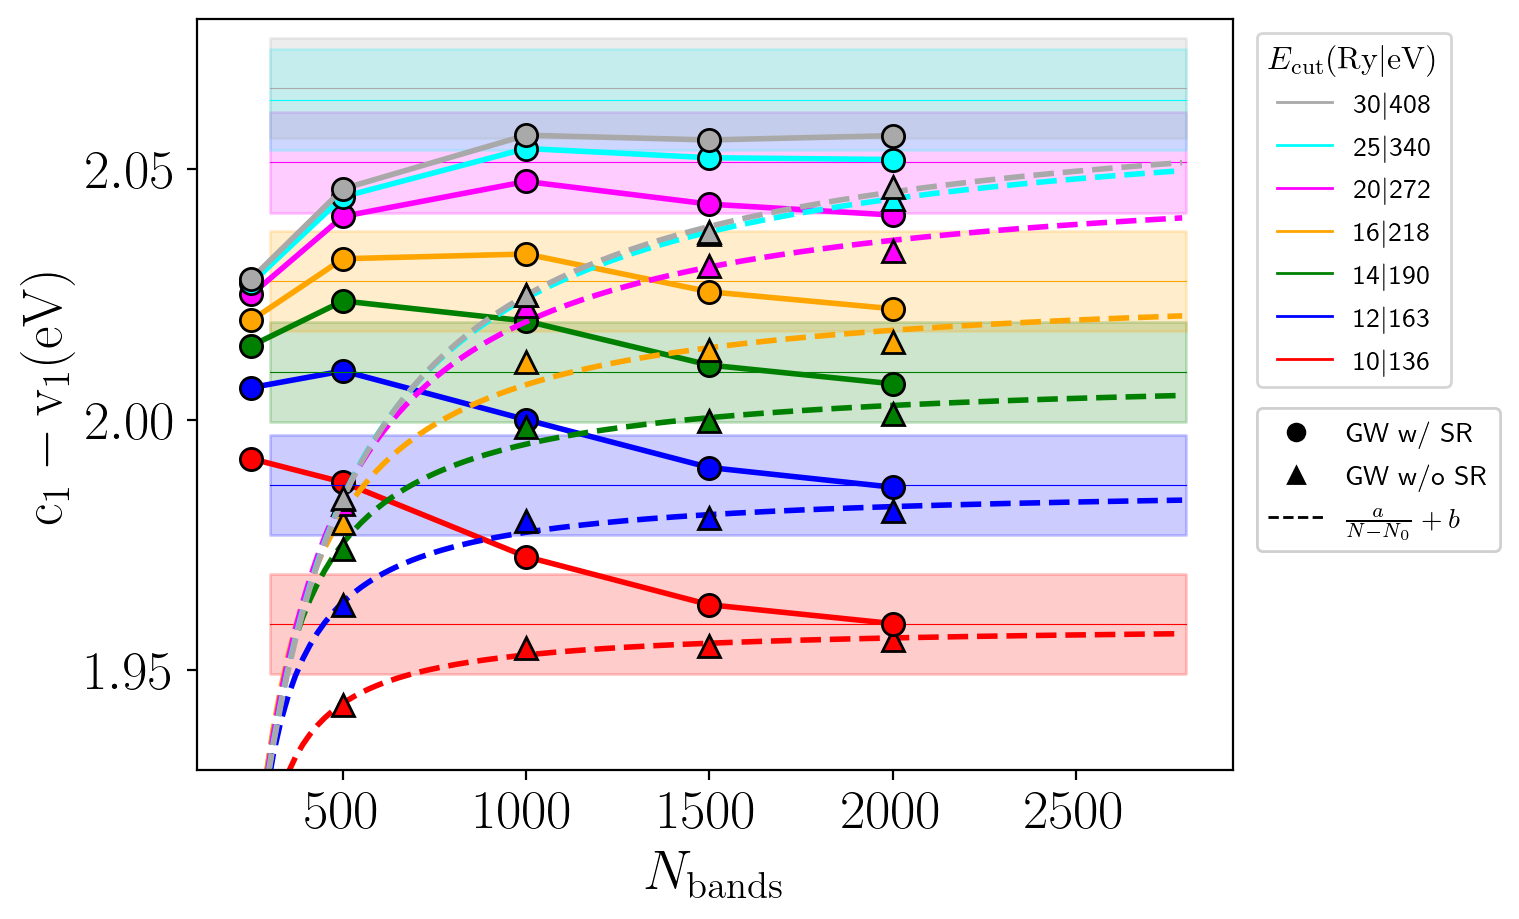

In [31]:
fig = plt.figure(dpi=200, figsize=(8,5))

plt.ylabel(r'$\mathrm{c_1} - \mathrm{v_1} (\mathrm{eV})$')
plt.xlabel(r'$N_{\mathrm{bands}}$') 

error = 0.01

for i in range(len(ecut_eps)):
    
    
    # ajuste_nbands(N, N0, a, b) -> a/(N-N0) + b
    popt, pcov = curve_fit(ajuste_nbands, Nbands, DATA_Egap_wo_static_rem[0][i])
    #print(popt)
    xfit = np.arange(min(Nbands)-20, max(Nbands)+800, 20)
    plt.plot(xfit, ajuste_nbands(xfit, *popt), '--', color=cores[i])
    
    Einf = popt[-1]

    plt.fill_between([300, 2800], Einf + error, Einf - error, color = cores[i], alpha=0.2)
    plt.plot([300, 2800], [Einf, Einf], color=cores[i], linewidth=0.4)
    
    plt.plot(Nbands, DATA_Egap_wo_static_rem[0][i] , '^', color=cores[i], markeredgecolor='k')
    plt.plot(Nbands, DATA_Egap[0][i] , 'o-', color=cores[i], markeredgecolor='k')
    


plt.rcParams['legend.title_fontsize'] = 'xx-small'

legend_elements2 = []

legend_elements2.append(Line2D([0], [0], linewidth=0, marker='o',
                       color='k', label='GW w/ SR', markersize=6)) 

legend_elements2.append(Line2D([0], [0], linewidth=0, marker='^',
                       color='k', label='GW w/o SR', markersize=6)) 

legend_elements2.append(Line2D([0], [0], linewidth=1, linestyle='--',
                       color='k', label=r'$\frac{a}{N-N_0} + b$', markersize=0)) 

legend_elements = []

for i in range(-1, -len(ecut_eps) - 1, -1):
    print(i, ecut_eps[i])
    ecut = ecut_eps[i]
    legend_elements.append(Line2D([0], [0], linewidth=1, 
                                  color=cores[i], label=str(ecut)+r'$|$'+str("{:.0f}".format(ecut*Ry2eV)), markersize=0))

legend1 = plt.legend(handles=legend_elements, title=r'$E_{\mathrm{cut}} \mathrm{(Ry | eV)}$', bbox_to_anchor=(1.01, 1.0), loc='upper left', fontsize=SMALL_SIZE/2)    
legend2 = plt.legend(handles=legend_elements2, bbox_to_anchor=(1.01, 0.5), loc='upper left', fontsize=SMALL_SIZE/2)  


fig.add_artist(legend1)
fig.add_artist(legend2)    
    
plt.ylim([1.93, 2.08])

plt.savefig('convergenceGW_Rpoints_Nbandas_Ecut_fixed.png')


#plt.plot([min(Nbands), max(Nbands)], [z[1], z[1]], 'k--')

In [32]:
for i in range(len(ecut_eps)):
    for j in range(len(Nbands)):
        print(ecut_eps[i], Nbands[j], DATA_Egap[0][i][j])

10 250 1.9921759999999997
10 500 1.9874770000000002
10 1000 1.972607
10 1500 1.9630130000000001
10 2000 1.959253
12 250 2.006382
12 500 2.009714
12 1000 1.9999689999999997
12 1500 1.9904219999999997
12 2000 1.9864899999999999
14 250 2.0147459999999997
14 500 2.0236870000000002
14 1000 2.0196780000000003
14 1500 2.010878
14 2000 2.0071450000000004
16 250 2.0198410000000004
16 500 2.032116
16 1000 2.033064
16 1500 2.025517
16 2000 2.022133
20 250 2.0249800000000002
20 500 2.04058
20 1000 2.0475510000000003
20 1500 2.0430269999999995
20 2000 2.0408410000000003
25 250 2.0272520000000003
25 500 2.044497
25 1000 2.054134
25 1500 2.0522940000000007
25 2000 2.0519329999999996
30 250 2.028136
30 500 2.0460860000000003
30 1000 2.0567920000000006
30 1500 2.0558439999999996
30 2000 2.056705


[-1.69115074  2.12996933] 2.113440473763652


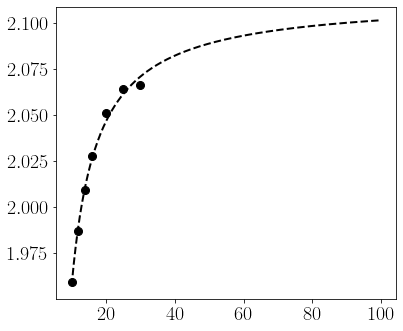

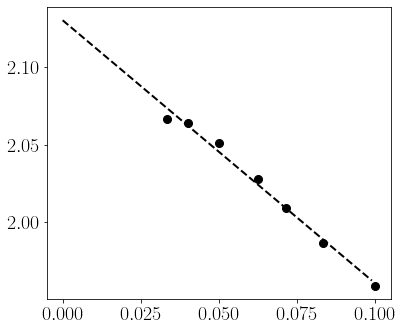

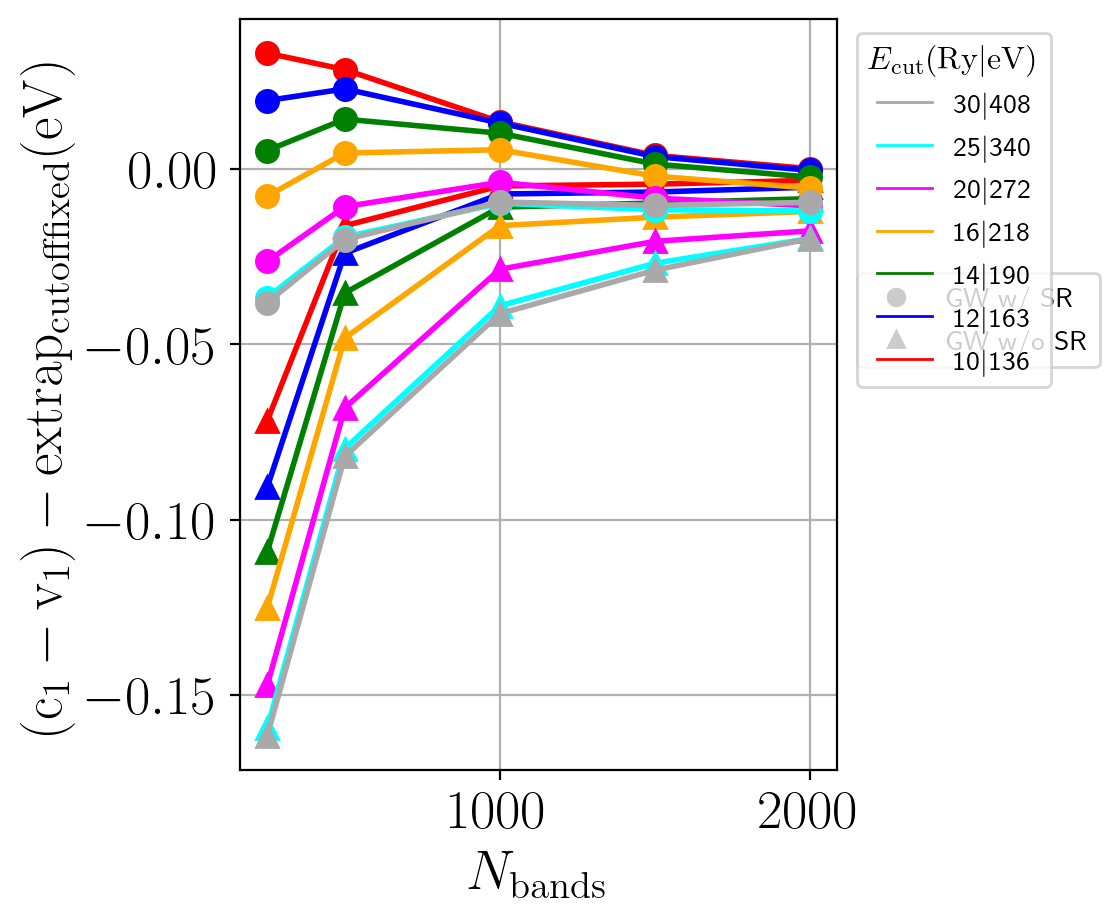

In [34]:

Egap_at_N_to_inf = []

for i in range(len(ecut_eps)):
    
    # ajuste_nbands(N, N0, a, b) -> a/(N-N0) + b
    popt, pcov = curve_fit(ajuste_nbands, Nbands, DATA_Egap_wo_static_rem[0][i])
    Egap_at_N_to_inf.append(popt[-1])

    
plt.figure()

x, y = np.array(ecut_eps), Egap_at_N_to_inf
popt, pcov = curve_fit(ajuste_nbands, x, y)
xfit = np.arange(10, 100, 0.2)
plt.plot(xfit, ajuste_nbands(xfit, *popt), 'k--')
plt.plot(x, y, 'ko')    
    
plt.figure()

x, y = 1/np.array(ecut_eps), Egap_at_N_to_inf
plt.plot(x, y, 'ko')

z = np.polyfit(x, y, 1)
xfit = np.arange(0.0, max(x), max(x)/100)
plt.plot(xfit, np.poly1d(z)(xfit), 'k--')

print(z, popt[-1])    

plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2.0, markersize=8.0) #, markeredgecolor='k')

fig = plt.figure(dpi=200)

plt.ylabel(r'$(\mathrm{c_1} - \mathrm{v_1}) - \mathrm{extrap_{cutoff fixed}} (\mathrm{eV})$')
plt.xlabel(r'$N_{\mathrm{bands}}$') 

for i in range(len(ecut_eps)):
    
    # ajuste_nbands(N, N0, a, b) -> a/(N-N0) + b
    popt, pcov = curve_fit(ajuste_nbands, Nbands, DATA_Egap_wo_static_rem[0][i])
    #print(popt)
    xfit = np.arange(min(Nbands)-20, max(Nbands)+400, 20)
    #plt.plot(xfit, ajuste_nbands(xfit, *popt) - popt[-1], '--', color=cores[i])
    
    plt.plot(Nbands, DATA_Egap_wo_static_rem[0][i] - popt[-1], '-^', color=cores[i], markeredgecolor=cores[i])
    plt.plot(Nbands, DATA_Egap[0][i] - popt[-1] , 'o-', color=cores[i], markeredgecolor=cores[i])


plt.rcParams['legend.title_fontsize'] = 'xx-small'
legend1 = plt.legend(handles=legend_elements, title=r'$E_{\mathrm{cut}} \mathrm{(Ry | eV)}$', bbox_to_anchor=(1.01, 1.0), loc='upper left', fontsize=SMALL_SIZE/2)    

legend_elements2 = []

legend_elements2.append(Line2D([0], [0], linewidth=0, marker='o',
                       color='k', label='GW w/ SR', markersize=6)) 

legend_elements2.append(Line2D([0], [0], linewidth=0, marker='^',
                       color='k', label='GW w/o SR', markersize=6)) 
    
legend2 = plt.legend(handles=legend_elements2, bbox_to_anchor=(1.01, 0.68), loc='upper left', fontsize=SMALL_SIZE/2)  


fig.add_artist(legend1)
#fig.add_artist(legend2)    
    

plt.grid(True)

#plt.plot([min(Nbands), max(Nbands)], [z[1], z[1]], 'k--')

In [35]:
# analise de cpu*hora

Ncpus = 960
base_dir = '../DATA/convergenceGWBSE/2_kpts/'

ecut_eps = [10, 12, 14, 16, 20, 25, 30]
#ecut_eps = [10] 
Nbands = [250, 500, 1000, 1500, 2000]

CPUTIME_sigma, CPUTIME_epsilon = [], []

for ecut in ecut_eps:
    CPUTIME_sigma.append([])
    CPUTIME_epsilon.append([])
    for bands in Nbands:
        arq_sigma = open(base_dir+'ecut_'+str(ecut)+'/7-sigma_'+str(bands)+'/tempo')
        arq_epsilon = open(base_dir+'ecut_'+str(ecut)+'/6-epsilon_'+str(bands)+'/tempo')
        for line in arq_sigma:
            linha = line.split()
            if len(linha) == 1:
                time = float(linha[0])
                CPUTIME_sigma[-1].append(time*Ncpus/3600)
                
        for line in arq_epsilon:
            linha = line.split()
            if len(linha) == 1:
                time = float(linha[0])
                CPUTIME_epsilon[-1].append(time*Ncpus/3600)                
        
for i in range(len(CPUTIME_epsilon)):
    CPUTIME_epsilon[i] = np.array(CPUTIME_epsilon[i])
    CPUTIME_sigma[i] = np.array(CPUTIME_sigma[i])

-1 30
-2 25
-3 20
-4 16
-5 14
-6 12
-7 10


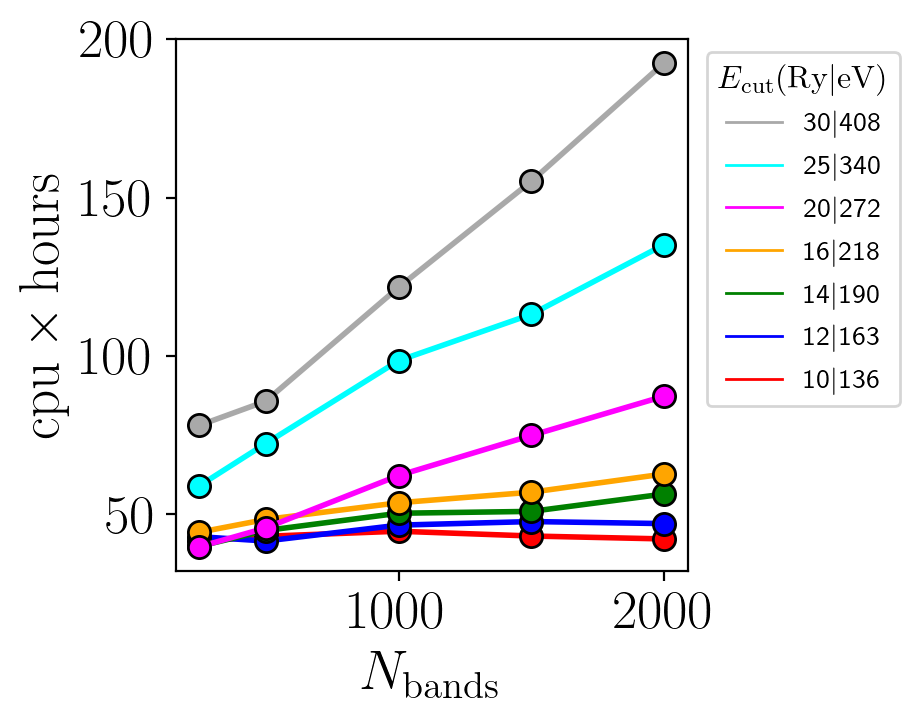

In [36]:
plt.figure(dpi=200, figsize=(5,4))

for i in range(len(ecut_eps)):
    plt.plot(Nbands, CPUTIME_sigma[i]+CPUTIME_epsilon[i], '-o', color=cores[i], label=str(ecut_eps[i]))
    #plt.plot(Nbands, , '-s', color=cores[i])
    
plt.xlabel(r'$N_{\mathrm{bands}}$')
plt.ylabel(r'$\mathrm{cpu \times hours}$')

legend_elements = []

for i in range(-1, -len(ecut_eps) - 1, -1):
    print(i, ecut_eps[i])
    ecut = ecut_eps[i]
    legend_elements.append(Line2D([0], [0], linewidth=1, 
                                  color=cores[i], label=str(ecut)+r'$|$'+str("{:.0f}".format(ecut*Ry2eV)), markersize=0))

legend = plt.legend(handles=legend_elements, title=r'$E_{\mathrm{cut}} \mathrm{(Ry | eV)}$', bbox_to_anchor=(1.01, 1.0), loc='upper left', fontsize=SMALL_SIZE/2)    

plt.savefig('computationalCost_convergence_studies.png')

In [46]:
base_dir = '../DATA/convergenceGWBSE/'

KPOINTS = [2, 4, 6]

DATA_Egap_vsK = []
DATA_Egap_vsK_wo_static_rem = []

ecut, bands = 30, 1000
kpoint = [1/2, 1/2, 1/2]

for i in range(len(KPOINTS)):
    
    arq = base_dir+str(KPOINTS[i])+'_kpts/'+'ecut_'+str(ecut)+'/7-sigma_'+str(bands)+'/sigma_hp.log'   
        
    ncol = 9
    eval = read_sigma(arq, 25, kpoint, ncol)
    DATA_Egap_vsK.append(read_sigma(arq, 26, kpoint, ncol) - eval)
        
    ncol = 13
    eval = read_sigma(arq, 25, kpoint, ncol)
    DATA_Egap_vsK_wo_static_rem.append(read_sigma(arq, 26, kpoint, ncol) - eval)
    

DATA_Egap_vsK2 = []
DATA_Egap_vsK_wo_static_rem2 = []

ecut, bands = 10, 1000
kpoint = [1/2, 1/2, 1/2]
KPOINTS = [2, 4, 6, 8]

for i in range(len(KPOINTS)):
    
    arq = base_dir+str(KPOINTS[i])+'_kpts/'+'ecut_'+str(ecut)+'/7-sigma_'+str(bands)+'/sigma_hp.log'   
        
    ncol = 9
    eval = read_sigma(arq, 25, kpoint, ncol)
    DATA_Egap_vsK2.append(read_sigma(arq, 26, kpoint, ncol) - eval)
        
    ncol = 13
    eval = read_sigma(arq, 25, kpoint, ncol)
    DATA_Egap_vsK_wo_static_rem2.append(read_sigma(arq, 26, kpoint, ncol) - eval)    

DATA_Egap_vsK3 = []
DATA_Egap_vsK_wo_static_rem3 = []

KPOINTS = [2, 4, 6, 8]
ecut, bands = 10, 250
kpoint = [1/2, 1/2, 1/2]

for i in range(len(KPOINTS)):
    
    arq = base_dir+str(KPOINTS[i])+'_kpts/'+'ecut_'+str(ecut)+'/7-sigma_'+str(bands)+'/sigma_hp.log'   
        
    ncol = 9
    eval = read_sigma(arq, 25, kpoint, ncol)
    DATA_Egap_vsK3.append(read_sigma(arq, 26, kpoint, ncol) - eval)
        
    ncol = 13
    eval = read_sigma(arq, 25, kpoint, ncol)
    DATA_Egap_vsK_wo_static_rem3.append(read_sigma(arq, 26, kpoint, ncol) - eval)     
    



In [1]:
plt.figure(dpi=200, figsize=(6,3))

KPOINTS = [2, 4, 6]
KPOINTS2 = [2, 4, 6, 8]

#plt.plot(KPOINTS, DATA_Egap_vsK, 'o-')
#plt.plot(KPOINTS, (np.array(DATA_Egap_vsK) - DATA_Egap_vsK[0])*1000, 'o-', 
#         label=r'$30  | 1000$')

plt.plot(KPOINTS2, (np.array(DATA_Egap_vsK2) - DATA_Egap_vsK2[0])*1000, 'o-', 
         label=r'$10 | 1000$')

plt.plot(KPOINTS2, (np.array(DATA_Egap_vsK3) - DATA_Egap_vsK3[0])*1000, 'o-', 
         label=r'$10 | 250$')


#plt.plot(KPOINTS, DATA_Egap_vsK_wo_static_rem, 's--')
#plt.plot(KPOINTS, np.array(DATA_Egap_vsK_wo_static_rem) - DATA_Egap_vsK_wo_static_rem[-1] , 's--',
#        label=r'$E_{\mathrm{cut}}=30 \mathrm{Ry} \\ N_{\mathrm{bands}}=1000$')

plt.xticks(KPOINTS2, fontsize=SMALL_SIZE*0.6)
plt.yticks(fontsize=SMALL_SIZE*0.6)
plt.xlabel(r'$N_k^{1/3}$', fontsize=SMALL_SIZE*0.6)
plt.ylabel(r'$E_{\mathrm{R}}(N_k) - E_{\mathrm{R}}(2^3) (\mathrm{meV})$', fontsize=SMALL_SIZE*0.6)
plt.rcParams['legend.title_fontsize'] = 'xx-small'
plt.legend(title = r'$E_{\mathrm{cut}} (\mathrm{Ry}) | N_{\mathrm{bands}}$', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=SMALL_SIZE/2)

plt.grid()

plt.savefig('convergenceGW_Rpoints_kgrid.png')

NameError: name 'plt' is not defined